In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime


import seaborn as sns

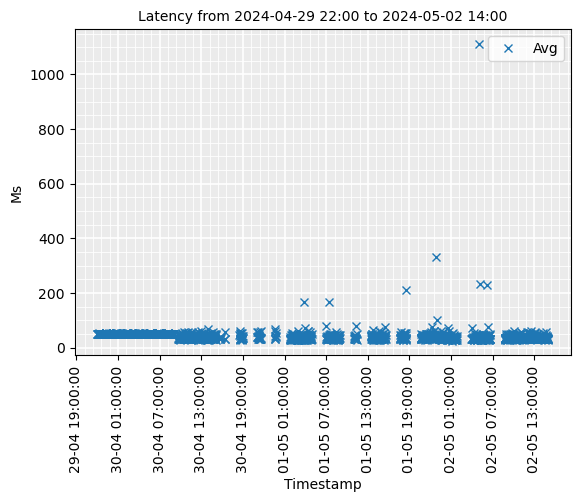

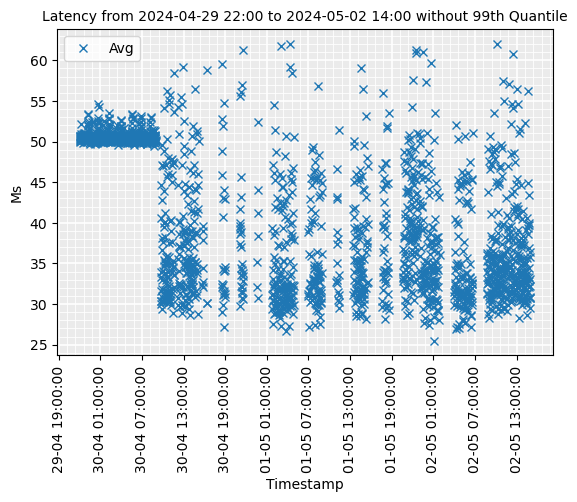

In [5]:
file1 = 'ping.csv'

df1 = pd.read_csv(file1)
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1 = df1.set_index('Timestamp')

dateBegin1 = '2024-04-29 22'
dateEnd1 = '2024-05-02 14'
dateBegin1_obj = datetime.strptime(dateBegin1, '%Y-%m-%d %H')
dateBegin1_str = dateBegin1_obj.strftime('%Y-%m-%d %H:%M')
dateEnd1_obj = datetime.strptime(dateEnd1, '%Y-%m-%d %H')
dateEnd1_str = dateEnd1_obj.strftime('%Y-%m-%d %H:%M')

data_range1 = df1.loc[dateBegin1:dateEnd1]
latency = pd.to_numeric(data_range1['Avg'])
q = data_range1['Avg'].quantile(0.99)
data_range99=data_range1[data_range1['Avg'] < q]
latency99 = pd.to_numeric(data_range99['Avg'])
########################################################################
fig, ax = plt.subplots()
latency.plot(ax=ax,ls='', marker='x')
title_str = f'Latency from {dateBegin1_str} to {dateEnd1_str}'
plt.ylabel('Ms')
plt.title(title_str, fontsize=10)
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.minorticks_on()
ax.legend(['Avg'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(which='minor', bottom=False, left=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))
########################################################################
fig, ax = plt.subplots()
latency99.plot(ax=ax,ls='', marker='x')
title_str = f'Latency from {dateBegin1_str} to {dateEnd1_str} without 99th Quantile'
plt.ylabel('Ms')
plt.title(title_str, fontsize=10)
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.minorticks_on()
ax.legend(['Avg'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(which='minor', bottom=False, left=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))

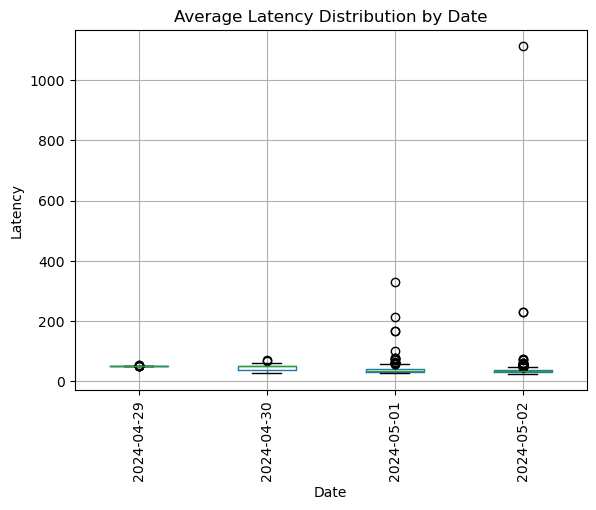

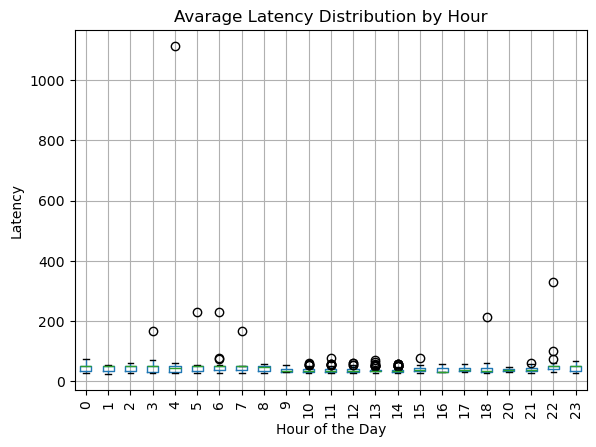

In [3]:
fig, ax = plt.subplots()
dates = data_range1.index.date
hours = data_range1.index.hour
data_range1=data_range1.assign(dates=dates)
data_range1=data_range1.assign(hours=hours)
data_range1.boxplot(ax=ax,column='Avg',by='dates')
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.get_figure().suptitle("")
ax.set_title('Average Latency Distribution by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Latency')
plt.show()
########################################################################
fig, ax = plt.subplots()
hours = data_range1.index.hour
data_range1=data_range1.assign(dates=dates)
data_range1=data_range1.assign(hours=hours)
data_range1.boxplot(ax=ax,column='Avg',by='hours')
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.get_figure().suptitle("")
ax.set_title('Avarage Latency Distribution by Hour')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Latency')
plt.show()

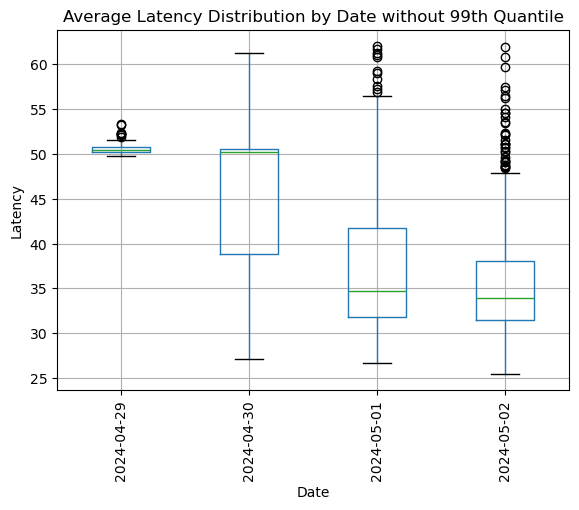

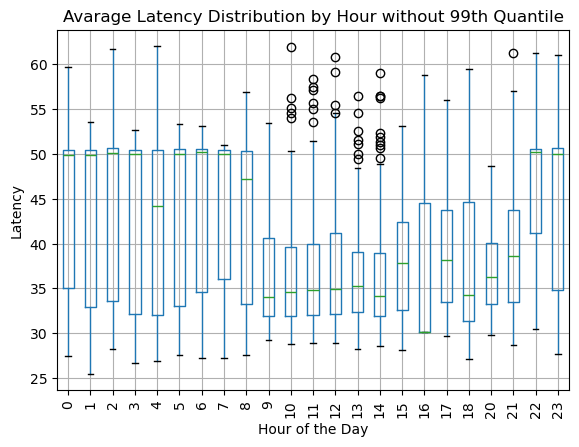

In [4]:
fig, ax = plt.subplots()
dates = data_range99.index.date
hours = data_range99.index.hour
data_range99=data_range99.assign(dates=dates)
data_range99=data_range99.assign(hours=hours)
data_range99.boxplot(ax=ax,column='Avg',by='dates')
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.get_figure().suptitle("")
ax.set_title('Average Latency Distribution by Date without 99th Quantile')
ax.set_xlabel('Date')
ax.set_ylabel('Latency')
plt.show()
########################################################################
fig, ax = plt.subplots()
hours = data_range99.index.hour
data_range99=data_range99.assign(dates=dates)
data_range99=data_range99.assign(hours=hours)
data_range99.boxplot(ax=ax,column='Avg',by='hours')
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.get_figure().suptitle("")
ax.set_title('Avarage Latency Distribution by Hour without 99th Quantile')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Latency')
plt.show()